In this exercise, I built a SKLearn linear regression model to predict Yen futures ("settle") returns with lagged Yen futures returns.

In [5]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline


In [6]:
yen_futures = pd.read_csv(
    Path("yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [10]:
#Yen Futures Returns
yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return,Lagged_Return
Date,,,,,,,,,,
2014-02-19,9768.0,9825.0,9760.0,9773.0,2.0,9773.0,129508.0,197197.0,-0.020460,-0.427829
2014-02-20,9774.0,9837.0,9765.0,9775.0,2.0,9775.0,160202.0,198280.0,0.020465,-0.020460
2014-02-21,9772.0,9776.0,9725.0,9758.0,20.0,9755.0,103091.0,202990.0,-0.204604,0.020465
2014-02-24,9752.0,9789.0,9740.0,9757.0,2.0,9757.0,90654.0,203114.0,0.020502,-0.204604
2014-02-25,9760.0,9808.0,9744.0,9789.0,32.0,9789.0,105498.0,201486.0,0.327970,0.020502


In [8]:
yen_futures['Return'] = yen_futures['Settle'].pct_change().replace(np.inf, np.nan).replace(-np.inf, np.nan) * 100
yen_futures = yen_futures.dropna()
yen_futures['Lagged_Return'] = yen_futures.Return.shift()
yen_futures.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return,Lagged_Return
Date,,,,,,,,,,
2019-10-09,9381.0,9391.5,9330.5,9343.5,38.5,9338.0,99153.0,145470.0,-0.410601,0.170931
2019-10-10,9343.5,9380.5,9293.5,9301.0,34.5,9303.5,159397.0,144474.0,-0.369458,-0.410601
2019-10-11,9308.5,9309.0,9240.0,9267.0,52.5,9251.0,158810.0,147471.0,-0.564304,-0.369458
2019-10-14,9259.0,9292.0,9250.5,9261.0,14.0,9265.0,69457.0,153902.0,0.151335,-0.564304
2019-10-15,9264.5,9280.0,9216.5,9220.0,43.5,9221.5,108342.0,151564.0,-0.469509,0.151335


In [9]:
#Lagged Returns
yen_futures['Lagged_Return'] = yen_futures['Return'].shift()
yen_futures.dropna(inplace=True)
yen_futures.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return,Lagged_Return
Date,,,,,,,,,,
2019-10-09,9381.0,9391.5,9330.5,9343.5,38.5,9338.0,99153.0,145470.0,-0.410601,0.170931
2019-10-10,9343.5,9380.5,9293.5,9301.0,34.5,9303.5,159397.0,144474.0,-0.369458,-0.410601
2019-10-11,9308.5,9309.0,9240.0,9267.0,52.5,9251.0,158810.0,147471.0,-0.564304,-0.369458
2019-10-14,9259.0,9292.0,9250.5,9261.0,14.0,9265.0,69457.0,153902.0,0.151335,-0.564304
2019-10-15,9264.5,9280.0,9216.5,9220.0,43.5,9221.5,108342.0,151564.0,-0.469509,0.151335


In [11]:
train = yen_futures[:'2017']
test = yen_futures['2018':]

train.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return,Lagged_Return
Date,,,,,,,,,,
2014-02-19,9768.0,9825.0,9760.0,9773.0,2.0,9773.0,129508.0,197197.0,-0.020460,-0.427829
2014-02-20,9774.0,9837.0,9765.0,9775.0,2.0,9775.0,160202.0,198280.0,0.020465,-0.020460
2014-02-21,9772.0,9776.0,9725.0,9758.0,20.0,9755.0,103091.0,202990.0,-0.204604,0.020465
2014-02-24,9752.0,9789.0,9740.0,9757.0,2.0,9757.0,90654.0,203114.0,0.020502,-0.204604
2014-02-25,9760.0,9808.0,9744.0,9789.0,32.0,9789.0,105498.0,201486.0,0.327970,0.020502


In [12]:
X_train = train.drop(columns=["Return"])
X_test = test.drop(columns=["Return"])
y_train = train["Return"].to_frame()
y_test = test["Return"].to_frame()

X_train

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Lagged_Return
Date,,,,,,,,,
2014-02-19,9768.0,9825.0,9760.0,9773.0,2.0,9773.0,129508.0,197197.0,-0.427829
2014-02-20,9774.0,9837.0,9765.0,9775.0,2.0,9775.0,160202.0,198280.0,-0.020460
2014-02-21,9772.0,9776.0,9725.0,9758.0,20.0,9755.0,103091.0,202990.0,0.020465
2014-02-24,9752.0,9789.0,9740.0,9757.0,2.0,9757.0,90654.0,203114.0,-0.204604
2014-02-25,9760.0,9808.0,9744.0,9789.0,32.0,9789.0,105498.0,201486.0,0.020502
...,...,...,...,...,...,...,...,...,...
2017-12-22,8871.0,8882.5,8864.5,8880.5,10.5,8881.0,71339.0,230870.0,0.084621
2017-12-26,8879.0,8898.5,8873.5,8884.5,10.5,8891.5,33864.0,229084.0,0.118370
2017-12-27,8887.0,8895.0,8869.0,8870.5,13.5,8878.0,86378.0,228295.0,0.118230


In [13]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

model.fit(X_train, y_train)

LinearRegression()

In [14]:
#Predictions using the Testing Data

predictions = pd.DataFrame(model.predict(X_test), index=X_test.index)

results = y_test
results["Predicted Return"] = predictions
results.head()

,Return,Predicted Return
Date,,
2018-01-02,0.297285,0.318917
2018-01-03,-0.240479,-0.279760
2018-01-04,-0.213028,-0.203871
2018-01-05,-0.353933,-0.326671
2018-01-08,0.062017,0.020844


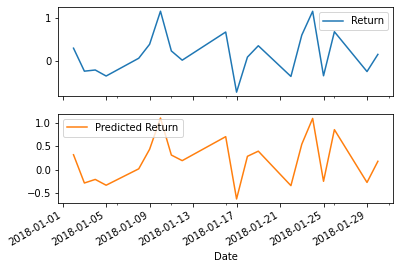

In [15]:
#Plot of the first 20 predictions vs the true values

results[:20].plot(subplots=True);

In [27]:
#Evaluation the model using "out-of-sample" data (X_test and y_test)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(
    results["Return"],
    results["Predicted Return"]
)

rmse = np.sqrt(mse)
print(f"Out-of-sample Root Mean Squared Error (RMSE): {rmse}")

Out-of-sample Root Mean Squared Error (RMSE): 0.16921667882257468


In [29]:
#Evaluating the model using in-sample data (X_train and y_train)

data_frame = pd.DataFrame(y_train, index=y_train.index)

data_frame['In-Sample Predictions'] = model.predict(X_train)

data_frame_mse = mean_squared_error(
    data_frame["Return"],
    data_frame["In-Sample Predictions"]
)

#In-sample root mean_squared_error
data_frame_mse = mean_squared_error(
    data_frame["Return"],
    data_frame["In-Sample Predictions"]
)

data_frame_rmse = np.sqrt(data_frame_mse)
print(f"In-sample Mean Squared Error (MSE): {data_frame_mse}")
print(f"In-sample Root Mean Squared Error (RMSE): {data_frame_rmse}")

In-sample Mean Squared Error (MSE): 0.02626661921966331
In-sample Root Mean Squared Error (RMSE): 0.16206979737034075
